In [29]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [5]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [10]:
df = pd.read_csv('data/men_shoes.csv', low_memory =  False)
df.shape

(18280, 48)

In [11]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [12]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [13]:
[3] * 5

[3, 3, 3, 3, 3]

In [16]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

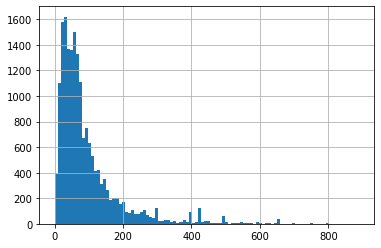

In [17]:
df['prices_amountmin'].hist(bins = 100)

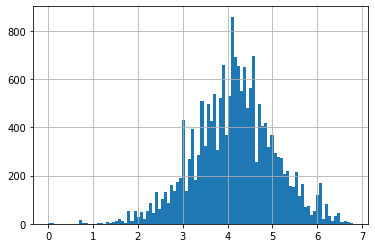

In [18]:
np.log1p(df['prices_amountmin']).hist(bins = 100)

In [19]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [20]:
np.median(y_true)

64.95

In [21]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean( np.log1p( y_true ) ) )

y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [22]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [24]:
df.brand.value_counts( )

Nike             1709
PUMA              574
Ralph Lauren      524
New Balance       361
VANS              356
                 ... 
Blac Label          1
Pleaser Shoes       1
Coggs               1
Girl                1
Juanerjie           1
Name: brand, Length: 1856, dtype: int64

In [26]:
df['brand_cat'] = df.brand.factorize()[0]

In [32]:
feats = ['brand_cat']
X = df[ feats ].values
y = df[ 'prices_amountmin' ].values

model = DecisionTreeRegressor(max_depth = 5 )

scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')

np.mean( scores ), np.std( scores )

(-58.38655694633361, 4.223555478221712)

In [34]:
def run(feats):
    X = df[ feats ].values
    y = df[ 'prices_amountmin' ].values

    model = DecisionTreeRegressor(max_depth = 5 )

    scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')

    return  np.mean( scores ), np.std( scores )

In [36]:
run(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [37]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight', 'brand_cat'],
      dtype='object')

In [38]:
df.manufacturer.value_counts()

Puma                  476
Nike                  374
New Balance           249
VANS                  170
Reebok                128
                     ... 
Pacific Shoe Corp.      1
Ellie Shoes Inc         1
Sebago                  1
Olukai                  1
Urban Pipeline          1
Name: manufacturer, Length: 618, dtype: int64

In [46]:
df['manufacturer_cat'] = df.manufacturer.factorize()[0]

In [48]:
run(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [50]:
run(['manufacturer_cat', 'brand_cat'])

(-58.53930419908596, 4.311223231615439)

In [54]:
!git add matrix_one/day4.ipynb